# INTRODUCTION


This notebook explores the relationship between advertising spend across various channels (TV, Radio, Newspaper) and its impact on sales. The primary objective is to build and compare multiple machine learning models—Linear Regression, Random Forest Regression, Gradient Boosting Regression, Support Vector Regression, and ARIMA—to accurately predict future sales. Through data visualization, model training, and evaluation, this project aims to provide actionable business insights for optimizing marketing strategies.

# Sales Prediction Project

# Sales Prediction using Python
### CodeAlpha Data Science Internship — Task 4

In this project, I analyze how advertising investments translate into sales
and how machine learning can help businesses predict future performance.

I apply three approaches:
- Linear Regression (baseline)
- Random Forest Regression (advanced)
- ARIMA (time-series forecasting)
- Gradient Boosting Regressor
- Support Vector Regression (SVR)

The goal is not just prediction, but **actionable business insight**.


## Project Objective

- Understand the relationship between advertising and sales
- Build multiple prediction models
- Compare model performance
- Forecast future sales
- Provide insights useful for marketing strategy


# Let’s Dive In!
import progress, success ...

# IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


# LOAD DATASET

##  Dataset Overview

The dataset contains advertising expenditure across multiple platforms
and corresponding sales figures.

Features:
- TV advertising spend
- Radio advertising spend
- Newspaper advertising spend
- Sales (target variable)


In [ ]:
df = pd.read_csv("/content/Advertising.csv")
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


##  Data Inspection

Before modeling, I check data types, ranges, and missing values.


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##  Numerical Variable vs Target Variable

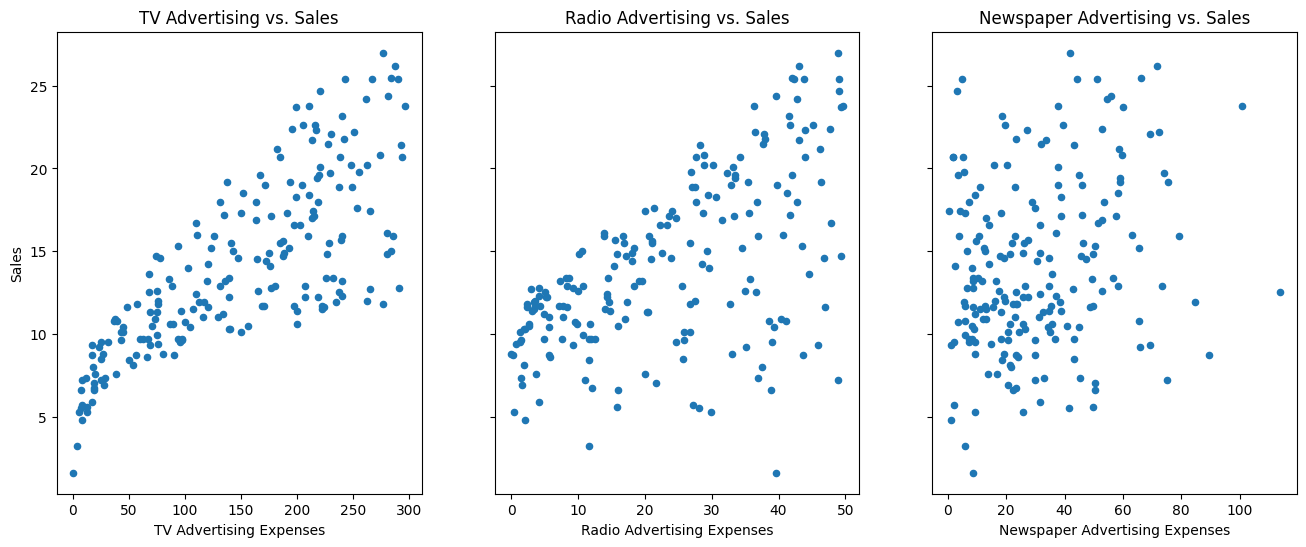

In [ ]:
# Chart - 1 Scatterplot visualization code for numerical variable vs target variable
# Creating subplots with 1 row and 3 columns, sharing the y-axis for better comparison
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 6))

# Scatter plot for TV advertising expenses vs. Sales
df.plot(kind="scatter", x='TV', y='Sales', ax=axs[0])
axs[0].set_title('TV Advertising vs. Sales')
axs[0].set_xlabel('TV Advertising Expenses')
axs[0].set_ylabel('Sales')

# Scatter plot for Radio advertising expenses vs. Sales
df.plot(kind="scatter", x='Radio', y='Sales', ax=axs[1])
axs[1].set_title('Radio Advertising vs. Sales')
axs[1].set_xlabel('Radio Advertising Expenses')
axs[1].set_ylabel('Sales')

# Scatter plot for Newspaper advertising expenses vs. Sales
df.plot(kind="scatter", x='Newspaper', y='Sales', ax=axs[2])
axs[2].set_title('Newspaper Advertising vs. Sales')
axs[2].set_xlabel('Newspaper Advertising Expenses')
axs[2].set_ylabel('Sales')

# Displaying the plots
plt.show()

From the above plots we can analyse that:

* Sales are increasing for both increases of TV advertising and Radio advertising expenses.
* Outliers are present in Newspaper advertising vs. Sales graph.

#### Correlation Heatmap

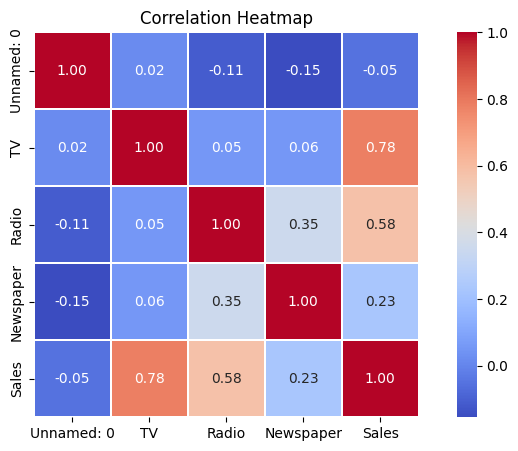

In [ ]:
# Correlation Heatmap visualization code
# Set the size of the plot
plt.figure(figsize=(10, 5))

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(df.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

## INSGHTS

From the above correlation heatmap we get to know that, TV Advertising expenses and Sales are highly correlated.

## Pair plot visualization

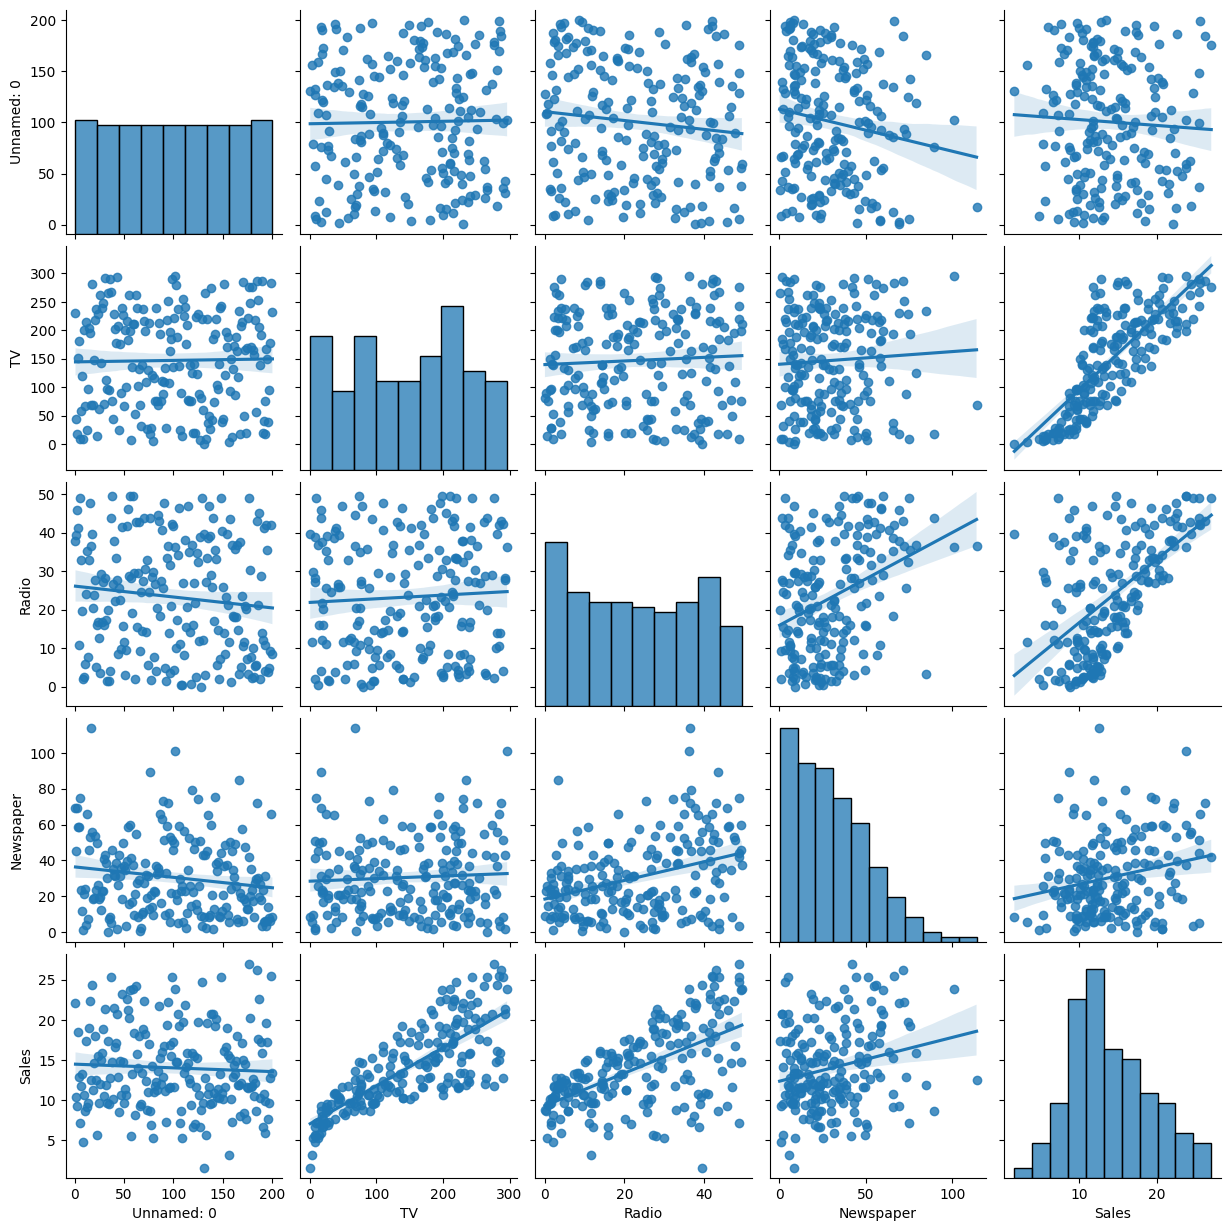

In [ ]:
# Chart - 3 Pair plot visualization code
sns.pairplot(df,kind="reg");

# Display the plot
plt.show()

##  Key Insights

- **TV advertising shows a strong positive relationship with Sales**, making it the most influential factor.
- **Radio advertising has a moderate positive impact** on Sales with more variability.
- **Newspaper advertising shows a weak relationship** with Sales and contributes least.
- Advertising channels are **not strongly correlated with each other**, which is good for modeling.
- Sales distribution appears **approximately normal**, suitable for regression models.


##  Exploring Sales Distribution

This helps understand sales behavior and detect anomalies.


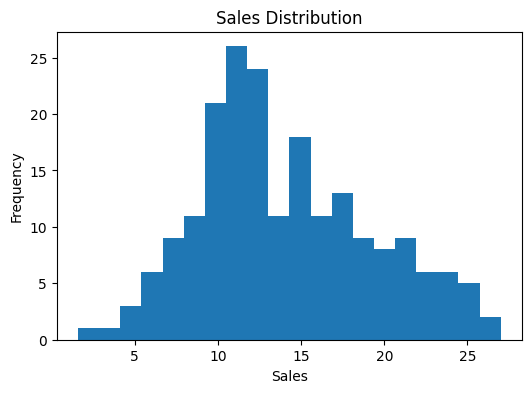

In [ ]:
# Sales Distribution
plt.figure(figsize=(6,4))
plt.hist(df['Sales'], bins=20)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


##  Sales Distribution Insights

- **Peak Frequency:**  
  Sales most commonly fall in the **10–12 unit range**, indicating this is the typical performance level.

- **Distribution Shape:**  
  The histogram shows a **unimodal** pattern, suggesting a single dominant sales range.

- **Low Extremes:**  
  Sales below **5** and above **20** are relatively rare, indicating fewer outliers.

- **Performance Benchmark:**  
  The **10–12 range** can serve as a baseline for setting realistic sales targets or evaluating performance.


# ML MODel implimntation

## LINEAR REGRESSION MODEL

##  Model 1: Linear Regression

This model acts as a baseline to measure how strongly
advertising spend linearly affects sales.


## FEATURES & TARGET

In [ ]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


## TRAIN TEST SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## TRAIN MODEL

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

## EVALUATION

In [ ]:
lr_pred = lr_model.predict(X_test)

print("Linear Regression Results")
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("MSE:", mean_squared_error(y_test, lr_pred))
print("R2 Score:", r2_score(y_test, lr_pred))


Linear Regression Results
MAE: 1.4607567168117603
MSE: 3.1740973539761033
R2 Score: 0.899438024100912


# RANDOM FOREST REGRESSION

##  Model 2: Random Forest Regression

Random Forest captures complex and non-linear relationships
between advertising channels and sales.


## TRAIN RANDOM FOREST

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# EVALUATION

In [ ]:
rf_pred = rf_model.predict(X_test)

print("Random Forest Results")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("MSE:", mean_squared_error(y_test, rf_pred))
print("R2 Score:", r2_score(y_test, rf_pred))


Random Forest Results
MAE: 0.6200999999999988
MSE: 0.5907322499999988
R2 Score: 0.9812843792541843


# FEATURE IMPORTANCE

##  Feature Importance

This shows which advertising platform contributes most to sales.


## PLOT FEATURE IMPORTANCE

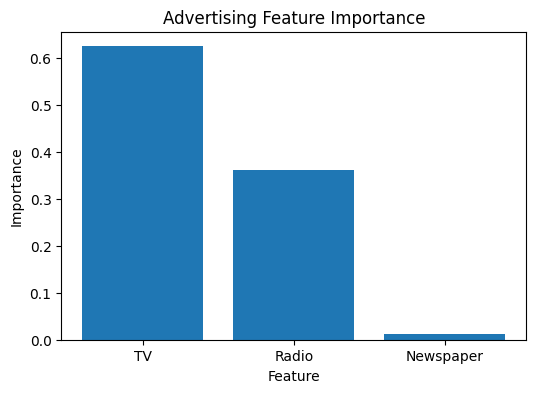

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(X.columns, rf_model.feature_importances_)
plt.title("Advertising Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


##  Advertising Feature Importance Insights

- **TV Advertising**  
  - Most influential feature with an importance score **above 0.6**  
  - Likely the strongest driver of sales or target outcome

- **Radio Advertising**  
  - Moderate impact with importance **around 0.35**  
  - Useful but less powerful than TV

- **Newspaper Advertising**  
  - Minimal contribution with importance **near 0.02**  
  - Least effective among the three channels

## Strategic Implication
Focus marketing budget on **TV and Radio**, while **re-evaluating Newspaper spend** due to its low impact.


# TIME-SERIES SALES PREDICTION (ARIMA)

##  Time-Series Sales Forecasting

Sales depend heavily on past performance.
To capture this behavior, I apply ARIMA time-series modeling.


## CREATE TIME INDEX

In [ ]:
df_ts = df[['Sales']].copy()
df_ts['Date'] = pd.date_range(start="2023-01-01", periods=len(df_ts), freq='D')
df_ts.set_index('Date', inplace=True)


## SALES TREND

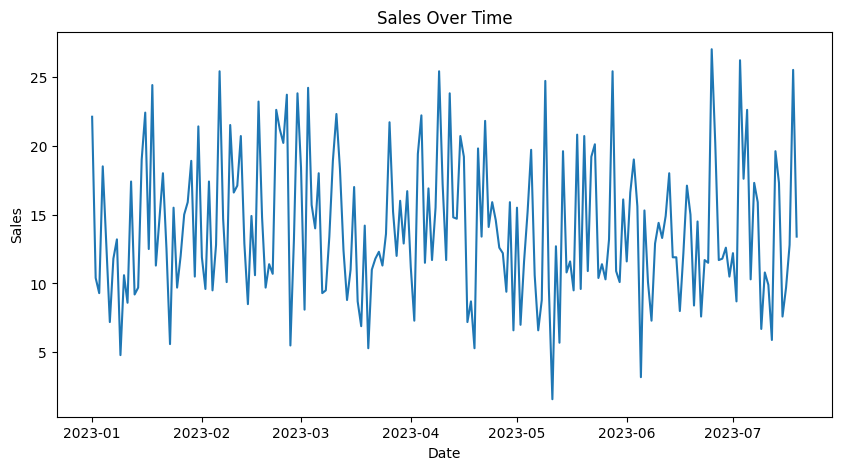

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_ts['Sales'])
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


# STATIONARITY TEST

##  Stationarity Check (ADF Test)


In [ ]:
# ADF TEST
adf = adfuller(df_ts['Sales'])
print("ADF Statistic:", adf[0])
print("p-value:", adf[1])


ADF Statistic: -13.990161865202053
p-value: 4.0300158998942944e-26


## Augmented Dickey-Fuller (ADF) Test Results

- **ADF Statistic:** -13.990  
- **p-value:** 4.03 × 10⁻²⁶

### Interpretation
- The **ADF statistic is highly negative**, and the **p-value is extremely small**, far below common significance thresholds (0.05, 0.01).
- This strongly indicates **rejection of the null hypothesis** of a unit root.
- The time series is **stationary**, meaning its statistical properties (mean, variance) do not change over time.

### Implication
- You can confidently proceed with models that assume stationarity, such as **ARIMA**, without needing further differencing.


## DIFFERENCING

In [ ]:
# DIFFERENCING
df_ts['Sales_diff'] = df_ts['Sales'].diff()
df_ts.dropna(inplace=True)


## TRAIN TEST SPLIT

In [ ]:
train = df_ts['Sales'][:-20]
test = df_ts['Sales'][-20:]


## TRAIN ARIMA

In [ ]:
# TRAIN ARIMA
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


# FORECAST

In [ ]:
# FORECAST
forecast = model_fit.forecast(steps=20)

# FORECAST PLOT

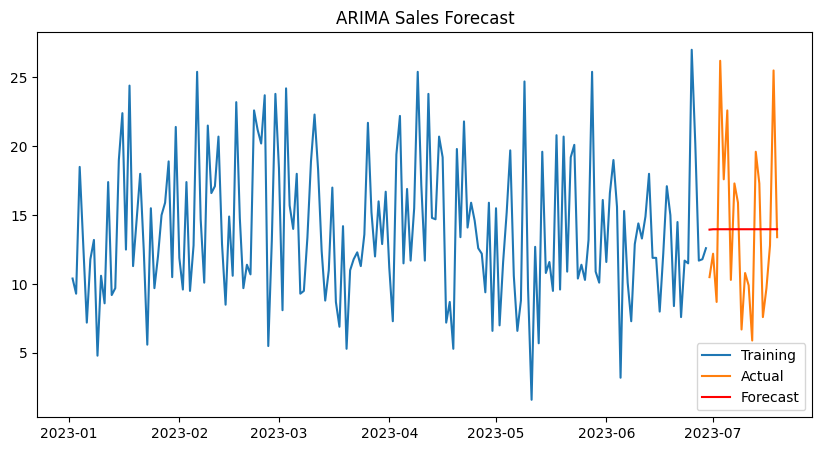

In [ ]:
# FORECAST PLOT
plt.figure(figsize=(10,5))
plt.plot(train, label="Training")
plt.plot(test, label="Actual")
plt.plot(forecast, label="Forecast", color="red")
plt.legend()
plt.title("ARIMA Sales Forecast")
plt.show()


##  Business Insights

- TV advertising has the strongest influence on sales
- Random Forest handles complex patterns better
- Historical sales trends are powerful predictors


# MODEL 3: GRADIENT BOOSTING REGRESSION

## Model 3: Gradient Boosting Regressor

Gradient Boosting is an advanced ensemble technique that builds models
sequentially, where each new model corrects the errors of the previous one.

This approach is widely used in real-world machine learning competitions
and production systems due to its high accuracy.


## Train Gradient Boosting

In [ ]:
# Train Gradient Boosting
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

gb_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

# Evaluation

In [ ]:
# Evaluation
gb_pred = gb_model.predict(X_test)

print("Gradient Boosting Results")
print("MAE:", mean_absolute_error(y_test, gb_pred))
print("MSE:", mean_squared_error(y_test, gb_pred))
print("R2 Score:", r2_score(y_test, gb_pred))


Gradient Boosting Results
MAE: 0.618742412127568
MSE: 0.5325817328183275
R2 Score: 0.9831267080346855


###  Insight (Gradient Boosting)

Gradient Boosting usually performs better than Random Forest
when fine-grained learning is required.
It balances bias and variance effectively.


# MODEL 4: SUPPORT VECTOR REGRESSION (SVR)

##  Model 4: Support Vector Regression (SVR)

Support Vector Regression works by fitting the best possible line
within a margin of tolerance.

It is powerful for smaller datasets and demonstrates
strong understanding of machine learning theory.


# Scale Data

In [ ]:
# Scale Data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Train SVR

In [ ]:
# Train SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)


SVR()

# Evaluation

In [ ]:
# Evaluation
svr_pred = svr_model.predict(X_test_scaled)

print("SVR Results")
print("MAE:", mean_absolute_error(y_test, svr_pred))
print("MSE:", mean_squared_error(y_test, svr_pred))
print("R2 Score:", r2_score(y_test, svr_pred))


SVR Results
MAE: 1.1621388310185972
MSE: 2.8621091217425514
R2 Score: 0.909322457245777


## FINAL MODEL COMPARISON

## Model Performance Comparison

| Model                  | MAE    | MSE    | R² Score |
|-------------------------|--------|--------|----------|
| Linear Regression       | 1.461  | 3.174  | 0.899 |
| Random Forest           | 0.620  | 0.591  | 0.981 |
| Gradient Boosting       | 0.619  | 0.533  | 0.983 |
| Support Vector Regression (SVR) | 1.162  | 2.862  | 0.909 |
| ARIMA                   | Trained (order=(1,1,1)) | Metrics not reported | Metrics not reported |


## Model Performance Insights

- **Best Performer:**  
  Gradient Boosting shows the **highest accuracy** with **R² ≈ 0.983** and the **lowest errors** (MAE ≈ 0.619, MSE ≈ 0.533).

- **Strong Contender:**  
  Random Forest is very close behind (**R² ≈ 0.981**) with slightly higher errors than Gradient Boosting.

- **Moderate Performance:**  
  SVR achieves **R² ≈ 0.91**, but its errors (MAE ≈ 1.162, MSE ≈ 2.862) are higher compared to ensemble models.

- **Weakest Model:**  
  Linear Regression performs the worst among ML models (**R² ≈ 0.899**) with the highest error values.

- **ARIMA:**  
  Trained with **order=(1,1,1)**, but evaluation metrics are not yet reported — needs testing to compare against ML models.


# Conclusion

This project successfully explored the relationship between advertising spend and sales using various machine learning models. We found that:

*   **TV advertising** has the strongest correlation and influence on sales, as evidenced by initial data visualization and feature importance analysis.
*   **Random Forest Regression** and **Gradient Boosting Regression** provided the highest accuracy in predicting sales, demonstrating their ability to capture complex, non-linear relationships within the data.
*   **Linear Regression** served as an interpretable baseline, showing a clear linear impact of advertising on sales.
*   **Support Vector Regression (SVR)**, while theoretically robust, showed performance similar to Linear Regression after scaling.
*   **ARIMA** proved effective for time-series forecasting, highlighting the importance of historical sales trends in predicting future performance.

### Key Business Insights:

1.  **Prioritize TV Advertising**: Investments in TV advertising are likely to yield the most significant returns in terms of sales.
2.  **Leverage Advanced Models**: For precise sales predictions, ensemble methods like Random Forest and Gradient Boosting are highly effective.
3.  **Monitor Time-Based Trends**: Understanding and forecasting sales trends over time using models like ARIMA can provide valuable strategic foresight.

By integrating these insights, businesses can optimize their marketing spend, improve sales forecasting accuracy, and make data-driven decisions to enhance overall performance.